In [1]:
# This box will install the Renishaw package to your machine.
# It will only need to be run once and can then be deleted (scissor button).


pip install renishawWiRE

# This can take a minute or two
# You might not see anything for a moment, if it's been over 10 min, try again.

# Once it's done, it should tell you that you may need to restart the kernel (close Jupyter and reopen)

In [1]:
# I have had to restart this box before also.

from renishawWiRE import WDFReader

In [2]:
from RIP_wdf import rip_2DIm as D2
from RIP_wdf import rip_hyper as hs
from RIP_wdf import PreProcessing as PP
from RIP_wdf import rip_layers as RL
from RIP_wdf import VolumeRaman as VRI

import common_functions_wdf as cf
import rip_rearrange_wdf as rr

In [3]:
import scipy
from scipy import signal
from sklearn.cluster import KMeans

from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
mpl.style.use('ggplot')
from matplotlib.colors import ListedColormap

In [4]:
name = 'FD_A_img_6(large) - CR - Nf - Bc - Nm.wdf'
reader = WDFReader(name)

spectra = reader.spectra
shp = spectra.shape

wn = reader.xdata
data = spectra.reshape(shp[0]*shp[1], len(wn))

In [5]:
Rng = pd.DataFrame(data).T.mean()
Rng.shape

(900,)

In [6]:
type(spectra)

numpy.ndarray

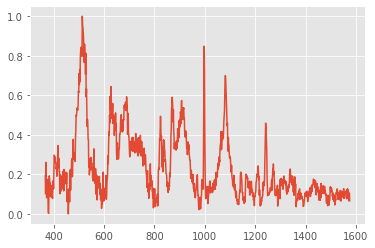

In [7]:
plt.plot(wn,data[130][::-1])
plt.show()

In [8]:
cf.three_variables(name,775,790).rngSel()

((array([], dtype=int64),), (array([680], dtype=int64),))

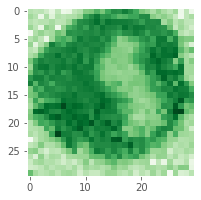

In [9]:
D2.shade_range2D(name, 419, 436,  'Greens').plotR_2D()

In [10]:
data = cf.one_variable(name).DataMat()

In [11]:
data.shape

(900, 1015)

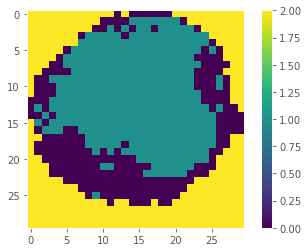

In [12]:
hs.KMS_img2D(name, data, 3).Kmeans_img()

In [39]:
labels = hs.KMS_img2D(name, data, 3).Kmeans_labels().rename(columns={0:'Labels'})
spectra = pd.DataFrame(data)
X = pd.concat([labels,spectra],axis=1).set_index('Labels')

In [40]:
X.loc[2] = 0

In [41]:
x = X.reset_index(drop=True)

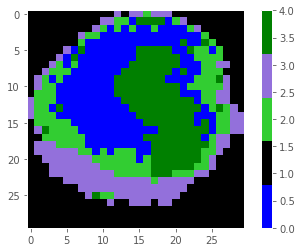

In [42]:
df_km2 = hs.KMS_img2D(name, x, 5).Kmeans_array()

cmap_KM = ListedColormap(["blue", "black", "limegreen", "mediumpurple","green"])

plt.figure()
plt.imshow(df_km2, cmap_KM)
plt.grid(False)
#plt.title('K-means: Off_18')
plt.colorbar()
plt.show()

In [43]:
Lbs = pd.DataFrame(df_km2.reshape((shp[0]*shp[1],1))).rename(columns={0: "Lbs"})

In [44]:
X2 = pd.concat([Lbs, x],axis=1).set_index('Lbs')

In [45]:
C0_av_spec = X2.loc[0].mean()
C1_av_spec = X2.loc[1].mean()
C2_av_spec = X2.loc[2].mean()
C3_av_spec = X2.loc[3].mean()
C4_av_spec = X2.loc[4].mean()

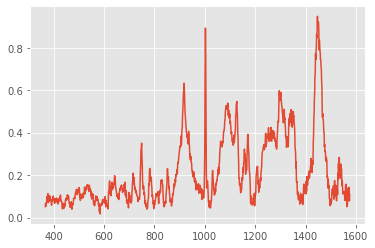

In [46]:
plt.plot(wn, np.array(C0_av_spec))

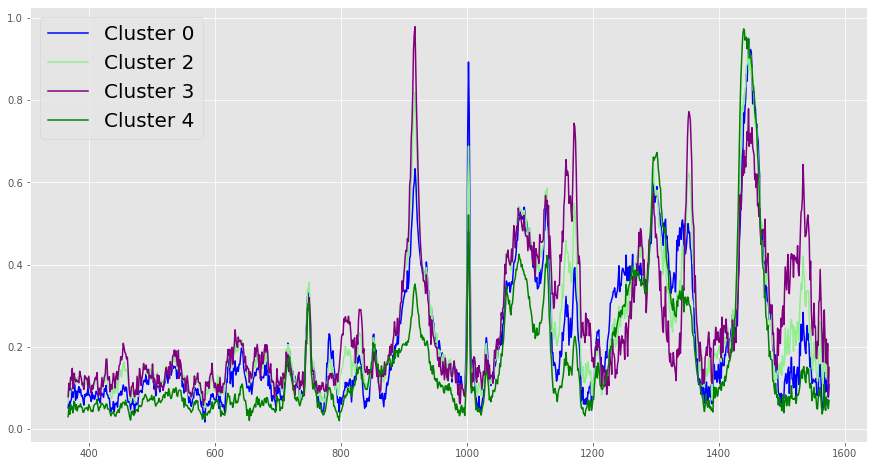

In [47]:
plt.figure(figsize=(15,8))
plt.plot(wn, np.array(C0_av_spec),label = 'Cluster 0', color='blue')
plt.plot(wn, np.array(C2_av_spec), label = 'Cluster 2', color='lightgreen')
plt.plot(wn, np.array(C3_av_spec), label = 'Cluster 3', color='purple')
plt.plot(wn, np.array(C4_av_spec), label = 'Cluster 4', color='green')

plt.legend(prop={'size': 20})

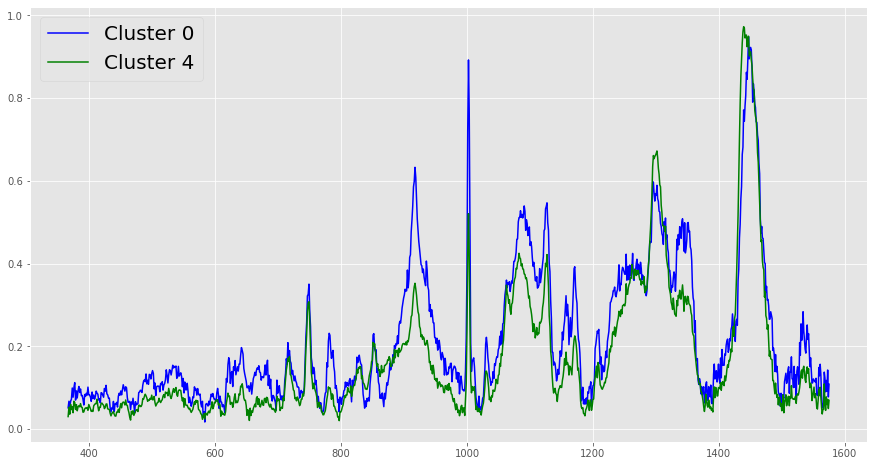

In [48]:
plt.figure(figsize=(15,8))
plt.plot(wn, np.array(C0_av_spec),label = 'Cluster 0', color='blue')
plt.plot(wn, np.array(C4_av_spec), label = 'Cluster 4', color='green')

plt.legend(prop={'size': 20})

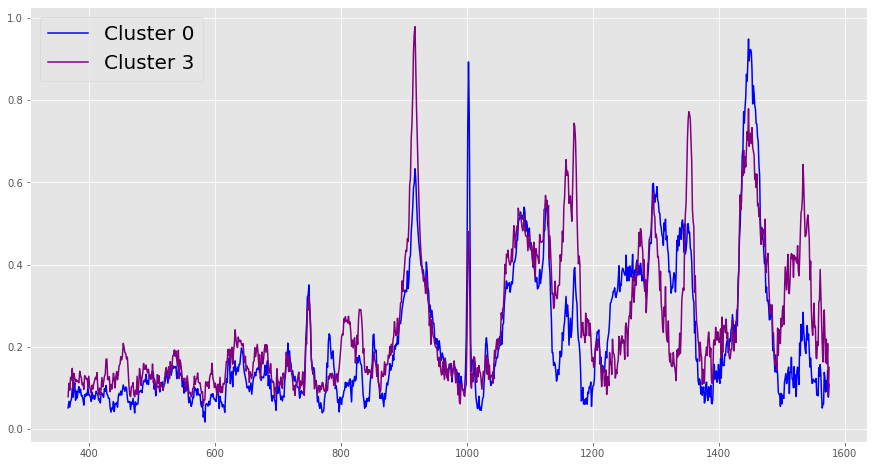

In [49]:
plt.figure(figsize=(15,8))
plt.plot(wn, np.array(C0_av_spec),label = 'Cluster 0', color='blue')
plt.plot(wn, np.array(C3_av_spec), label = 'Cluster 3', color='purple')

plt.legend(prop={'size': 20})

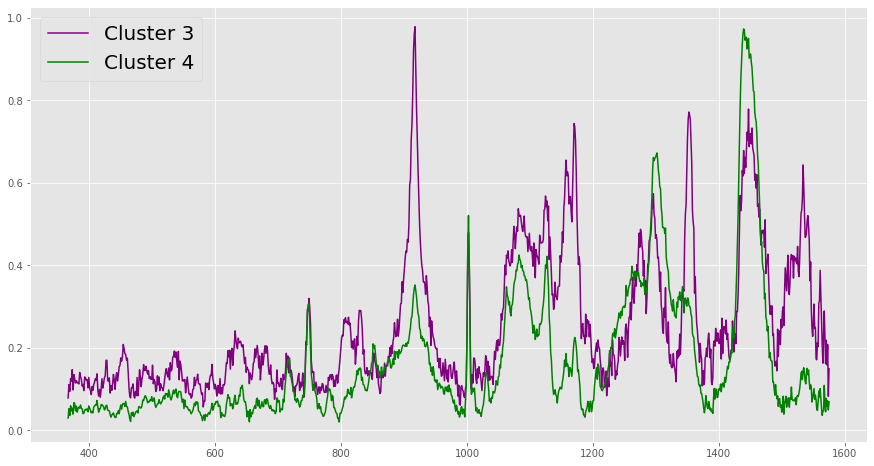

In [50]:
plt.figure(figsize=(15,8))
plt.plot(wn, np.array(C3_av_spec), label = 'Cluster 3', color='purple')
plt.plot(wn, np.array(C4_av_spec), label = 'Cluster 4', color='green')

plt.legend(prop={'size': 20})

In [51]:
colors = [(0, 0, 0), (0.8, 0.8, 0)]  # Yellow -> Black

cmap_name = 'my_list'
cmap_yb = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

In [52]:
colors = [(0, 0, 0), (0, 1, 0)]  # Green -> Black

cmap_name = 'my_list'
cmap_gb = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

In [53]:
colors = [(0, 0, 0), (0, 0, 1)]  # Blue -> Black

cmap_name = 'my_list'
cmap_bb = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

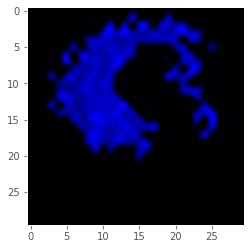

In [54]:
test = RL.one_transparent_cluster(x, 5, 0).transparent_df()
ldb = VRI.rng_csv(test, 892, 905)
img = np.array(ldb).reshape((shp[0],shp[1]))
plt.imshow(img,cmap=cmap_bb, interpolation='lanczos')
#plt.colorbar()
plt.grid(False)
#plt.show()
plt.savefig('Nucleus(i).png')

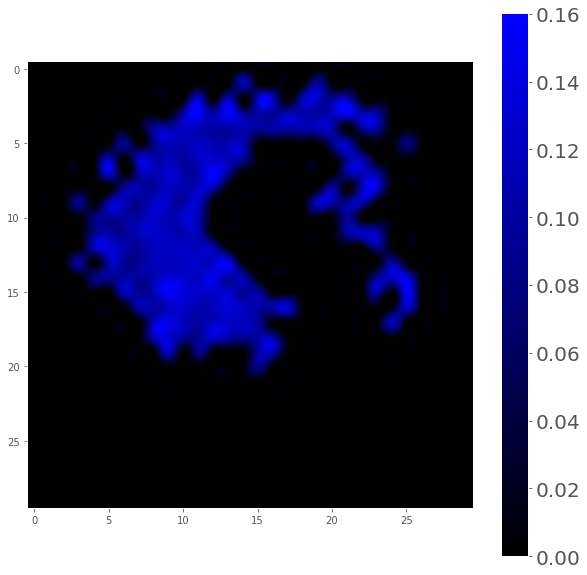

In [55]:
test = RL.one_transparent_cluster(x, 5, 0).transparent_df()
ldb = VRI.rng_csv(test, 892, 905)
img = np.array(ldb).reshape((shp[0],shp[1]))

plt.figure(figsize=(10,10))
plt.imshow(img,cmap=cmap_bb, interpolation='lanczos')
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
plt.grid(False)
#plt.show()
plt.savefig('Nucleus(cb).png')

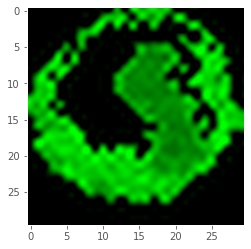

In [57]:
test = RL.three_transparent_clusters(x, 5, 2, 3, 4).transparent_df3()
ldb = VRI.rng_csv(test, 419, 436)
img = np.array(ldb).reshape((shp[0],shp[1]))
plt.imshow(img,cmap=cmap_gb, interpolation='lanczos')
#plt.colorbar()
plt.grid(False)
#plt.show()
plt.savefig('Cell_body(i).png')

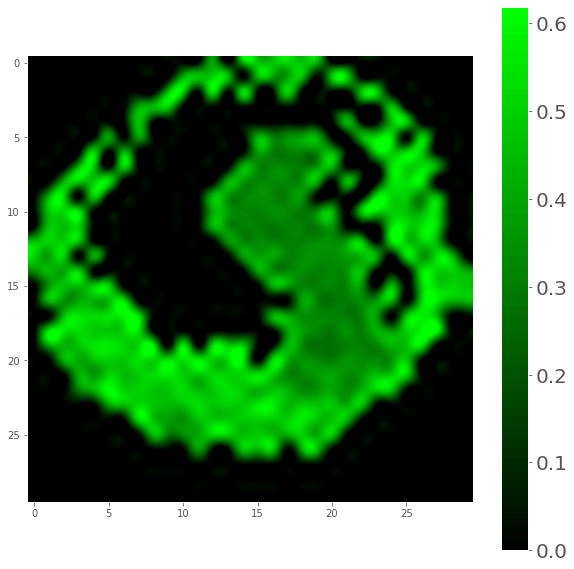

In [58]:
test = RL.three_transparent_clusters(x, 5, 2, 3, 4).transparent_df3()
ldb = VRI.rng_csv(test, 419, 436)
img = np.array(ldb).reshape((shp[0],shp[1]))

plt.figure(figsize=(10,10))
plt.imshow(img,cmap=cmap_gb, interpolation='lanczos')
cb = plt.colorbar()
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
plt.grid(False)
#plt.show()
plt.savefig('Cell_body(cb).png')

In [ ]:
# This is spare code for when the cytoplasm needs a transparent background also 
# (which can then be layered onto another layer, such as a scaffold image)


"""from PIL import Image
image = Image.open("Cell_body(i).png").convert('RGBA')
pixeldata = list(image.getdata())

for i,pixel in enumerate(pixeldata):
    if pixel[:3] <= (0,5,0):
        pixeldata[i] = (255,255,255,0)
    #elif pixel[:3] == (255,255,255):
        #pixeldata[i] = (255,255,255,0)

image.putdata(pixeldata)
image.save("Cytoplasm(t).png")
#set(pixeldata)"""

In [52]:
image = Image.open("Nucleus(i).png").convert('RGBA')
pixeldata = list(image.getdata())

for i,pixel in enumerate(pixeldata):
    if pixel[:3] <= (0,0,18):
        pixeldata[i] = (255,255,255,0)
    #elif pixel[:3] == (255,255,255):
        #pixeldata[i] = (255,255,255,0)

image.putdata(pixeldata)
image.save("Nucleus(t).png")
#set(pixeldata)

In [53]:
background = Image.open("Cell_body(i).png")
foreground = Image.open("Nucleus(t).png")

background.paste(foreground, (0, 0), foreground)
background.save('Combined.png')